In [110]:
from tictactoe import *
from tictactoe_helper import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [111]:
n_plot_groups = 100

## Train Expert X and Expert O

In [112]:
expertX = ttt_player('computer', 'X', epsilon=.9)
expertO = ttt_player('computer', 'O', epsilon=.9)

In [113]:
%%time
n_games = 1000000
expertX_expertO_training_game = train_computer_players(expertX, expertO, n_games=n_games)
expertX_expertO_train_scores, expertX_expertO_train_scores_agg = \
    compute_player_stats(expertX_expertO_training_game, 'playerO', n_groups=n_plot_groups)

CPU times: user 4min 3s, sys: 694 ms, total: 4min 3s
Wall time: 4min 8s


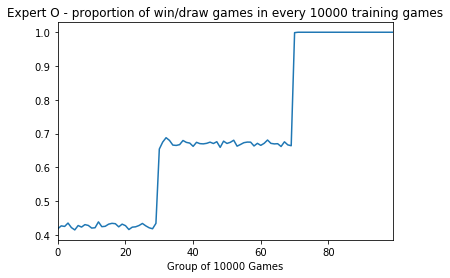

In [114]:
games_per_group = int(n_games/float(n_plot_groups))
expertX_expertO_train_scores_agg.plot()
plt.title('Expert O - proportion of win/draw games in every {} training games'\
              .format(games_per_group))
plt.xlabel('Group of {} Games'.format(games_per_group));

In [115]:
expertX_expertO_train_scores[-10000:].score.value_counts()

0.5    10000
Name: score, dtype: int64

## Expert X and Expert O should tie every game

In [116]:
expertX.set_epsilon(0)
expertX.set_alpha(0)
expertO.set_epsilon(0)
expertO.set_alpha(0)

In [117]:
n_games = 2000
expertX_expertO_game = train_computer_players(expertX, expertO, n_games=n_games,
                                              adj_pO_epsilon=False, adj_pX_epsilon=False)
expertX_expertO_scores, expertX_expertO_scores_agg = compute_player_stats(expertX_expertO_game, 'playerO',
                                                                         n_groups=n_plot_groups)

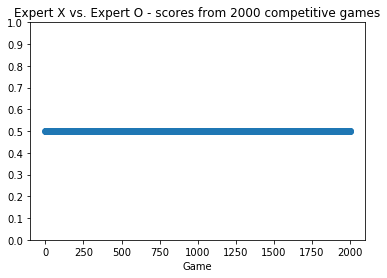

In [118]:
plt.scatter(np.arange(len(expertX_expertO_scores)), expertX_expertO_scores.score)
plt.ylim(0,1)
plt.yticks(np.arange(0,1.1,.1))
plt.xlabel('Game')
plt.title('Expert X vs. Expert O - scores from 2000 competitive games');

## How often does Expert O win/draw against a Random X Player?

In [119]:
randomX = ttt_player('computer', 'X', epsilon=1)

In [120]:
n_games = 80000
randomX_expertO_game = train_computer_players(randomX, expertO, n_games=n_games,
                                              adj_pO_epsilon=False, adj_pX_epsilon=False)

In [121]:
randomX_expertO_scores, randomX_expertO_scores_agg = compute_player_stats(randomX_expertO_game,
                                                                          'playerO',
                                                                          n_groups=n_plot_groups)

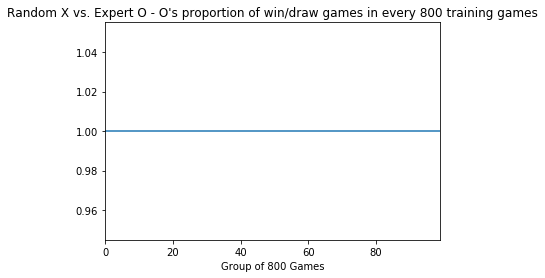

In [122]:
games_per_group = int(n_games/float(n_plot_groups))
randomX_expertO_scores_agg.plot()
plt.title('Random X vs. Expert O - O\'s proportion of win/draw games in every {} training games'\
          .format(games_per_group))
plt.xlabel('Group of {} Games'.format(games_per_group));

In [123]:
randomX_expertO_scores.score.value_counts(normalize=True)

1.0    0.915937
0.5    0.084062
Name: score, dtype: float64

In [ ]:
# View game between the two

# randomX_expertO_game.reset()
# randomX_expertO_game.set_print(True)
# randomX_expertO_game.play()

## Train Prodigy X and Prodigy O
These should be experts like the above, but let's see how few games they can play and still attain expert status.

In [217]:
prodigyX = ttt_player('computer', 'X', epsilon=.9, alpha=.6)
prodigyO = ttt_player('computer', 'O', epsilon=.9, alpha=.6)

In [218]:
# Train prodigies
n_games = 35000
prodigyX_prodigyO_training_game = train_computer_players(prodigyX, prodigyO, n_games=n_games)
prodigyX_prodigyO_train_scores, prodigyX_prodigyO_train_scores_agg = \
    compute_player_stats(prodigyX_prodigyO_training_game, 'playerO', n_groups=n_plot_groups)

In [219]:
# Have prodigies play experts
prodigyO.set_epsilon(0)
prodigyX.set_epsilon(0)
prodigyO.set_alpha(0)
prodigyX.set_alpha(0)

n_games = 50000
expertX_prodigyO_game = train_computer_players(expertX, prodigyO, n_games=n_games,
                                              adj_pO_epsilon=False, adj_pX_epsilon=False)
expertX_prodigyO_scores, expertX_prodigyO_scores_agg = compute_player_stats(expertX_prodigyO_game, 'playerO',
                                                                         n_groups=n_plot_groups)

prodigyX_expertO_game = train_computer_players(prodigyX, expertO, n_games=n_games,
                                              adj_pO_epsilon=False, adj_pX_epsilon=False)
prodigyX_expertO_scores, prodigyX_expertO_scores_agg = compute_player_stats(prodigyX_expertO_game, 'playerO',
                                                                         n_groups=n_plot_groups)

In [220]:
expertX_prodigyO_scores.score.value_counts()

0.5    50000
Name: score, dtype: int64

In [221]:
prodigyX_expertO_scores.score.value_counts()

0.5    50000
Name: score, dtype: int64

## Train Apprentice O

In [222]:
apprenticeO = ttt_player('computer', 'O', epsilon=.9, alpha=.6)

In [223]:
n_games = 35000
expertX_apprenticeO_training_game = train_computer_players(expertX, apprenticeO, 
                                                           adj_pX_epsilon=False,
                                                           n_games=n_games)
expertX_apprenticeO_scores, expertX_apprenticeO_scores_agg = \
    compute_player_stats(expertX_apprenticeO_training_game, 'playerO')

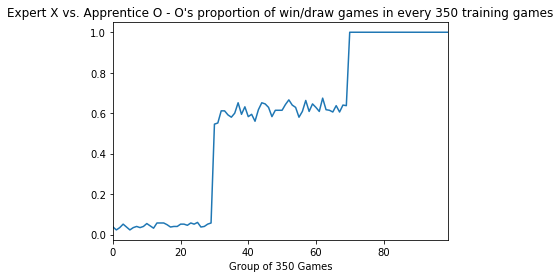

In [224]:
games_per_group = int(n_games/float(n_plot_groups))
expertX_apprenticeO_scores_agg.plot()
plt.title('Expert X vs. Apprentice O - O\'s proportion of win/draw games in every {} training games'\
          .format(games_per_group))
plt.xlabel('Group of {} Games'.format(games_per_group));

In [225]:
len(apprenticeO.policy)

1427

## How often does Apprentice O win/draw against a Random X Player?

In [226]:
apprenticeO.set_alpha(0)
apprenticeO.set_epsilon(0)

In [227]:
n_games = 50000
randomX_apprenticeO_game = train_computer_players(randomX, apprenticeO, n_games=n_games,
                                              adj_pO_epsilon=False, adj_pX_epsilon=False)
randomX_apprenticeO_scores, randomX_apprenticeO_scores_agg = compute_player_stats(randomX_apprenticeO_game, 'playerO')

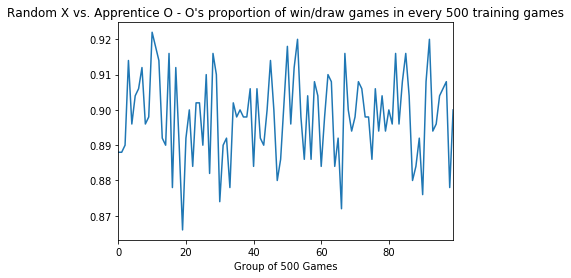

In [228]:
games_per_group = int(n_games/float(n_plot_groups))
randomX_apprenticeO_scores_agg.plot()
plt.title('Random X vs. Apprentice O - O\'s proportion of win/draw games in every {} training games'\
          .format(games_per_group))
plt.xlabel('Group of {} Games'.format(games_per_group));

In [229]:
randomX_apprenticeO_scores.score.value_counts(normalize=True)

1.0    0.69374
0.5    0.20458
0.0    0.10168
Name: score, dtype: float64

## Can I train a better O Player if I have Expert X explore?

In [373]:
challengerO = ttt_player('computer', 'O', epsilon=.9, alpha=.6)

In [364]:
# I tried having Challenger O learn very quickly from an Expert X that wasn't
# exploring, and then doing normal learning against Expert X below.
# It  didn't really help.

# n_games = 7000
# challengerO.set_alpha=1
# expertX_challengerO_training_game1 = train_computer_players(expertX, challengerO,
#                                                            adj_pX_epsilon=False,
#                                                            adj_pO_epsilon=False,
#                                                            n_games=n_games)
# expertX_challengerO_train_scores1, expertX_challengerO_train_scores_agg1 = \
#     compute_player_stats(expertX_challengerO_training_game1, 'playerO', n_groups=n_plot_groups)

In [374]:
n_games = 25000
expertX_challengerO_training_game = train_computer_players(expertX, challengerO,
                                                           n_games=n_games)
expertX_challengerO_train_scores, expertX_challengerO_train_scores_agg = \
    compute_player_stats(expertX_challengerO_training_game, 'playerO', n_groups=n_plot_groups)

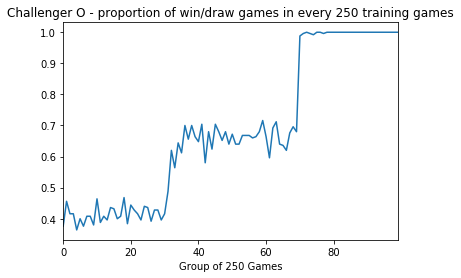

In [375]:
games_per_group = int(n_games/float(n_plot_groups))
expertX_challengerO_train_scores_agg.plot()
plt.title('Challenger O - proportion of win/draw games in every {} training games'\
          .format(games_per_group))
plt.xlabel('Group of {} Games'.format(games_per_group));

In [376]:
expertX_challengerO_train_scores.score.value_counts()

0.5    13131
0.0     7925
1.0     3944
Name: score, dtype: int64

In [377]:
last_30_percent = int(n_games * .3)
expertX_challengerO_train_scores.score.iloc[-last_30_percent:].value_counts()

0.5    7492
0.0       8
Name: score, dtype: int64

## Challenger O should do much better against Random X

In [378]:
challengerO.set_alpha(0)
challengerO.set_epsilon(0)

In [379]:
n_games = 20000
randomX_challengerO_game = train_computer_players(randomX, challengerO, n_games=n_games,
                                              adj_pO_epsilon=False, adj_pX_epsilon=False)
randomX_challengerO_scores, randomX_challengerO_scores_agg = compute_player_stats(randomX_challengerO_game, 'playerO',
                                                                                 n_groups=n_plot_groups)

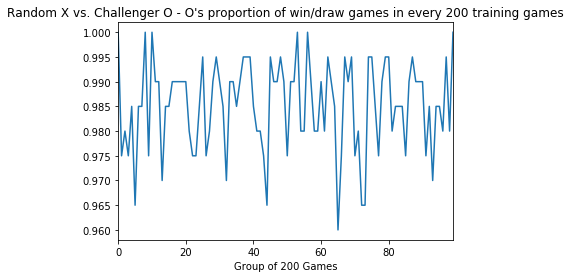

In [380]:
games_per_group = int(n_games/float(n_plot_groups))
randomX_challengerO_scores_agg.plot()
plt.title('Random X vs. Challenger O - O\'s proportion of win/draw games in every {} training games'\
          .format(games_per_group))
plt.xlabel('Group of {} Games'.format(games_per_group));

In [381]:
randomX_challengerO_scores.score.value_counts(normalize=True)

1.0    0.7771
0.5    0.2082
0.0    0.0147
Name: score, dtype: float64